O objetivo desse notebook é realizar algumas analises e tirar alguns insights sobre o titanic relacionado aos passageiros e os sobreviventes.

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importando o meu dataframe
df = pd.read_csv('Titanic-Dataset.csv')

Após importar os dados, é uma boa prática trazer algumas informações sobre o conjunto de dados.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Nessa próxima etapa, vamos verificar alguns dados de colunas importantes do nosso dataframe, limpar valores vazios, mudar o tipo de algumas colunas e criar novas colunas para ter uma melhor volatilidade na analise e manipulação dos dados.

In [7]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
# contagem de valores unicos dentro da coluna Sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# contagem de valores unicos dentro da coluna Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df['Embarked'].isna().sum()

2

In [12]:
# Irei criar uma nova coluna que será a soma de número de irmãos/cônjuges a bordo e o número de pais/filhos a bordo
df['FamilySize'] = df['SibSp'] + df['Parch']

In [13]:
# Verifico se a coluna foi criada com sucesso
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [14]:
# Será removido todas as linhas com valores vazios da coluna Embarked
df = df.dropna(subset=['Embarked'])

In [15]:
# A solução usada para os valores vazios da coluna Age será substituir pela média de idade, que foi localizada pela função describe.
df['Age'] = df['Age'].fillna(29)

In [16]:
# Vou converter para tipo inteiro a coluna Fare
df['Fare'] = df['Fare'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    int32  
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   889 non-null    int64  
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 93.8+ KB


In [18]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [19]:
# vou pegar a soma e o total de sobreviventes e verificar a porcentagem dos sobreviventes do navio.
df_sobreviventes = df[df['Survived'] == 1]
df_soma_sobreviventes = df_sobreviventes['Survived'].count()
df_total_sobreviventes = df['Survived'].count()
df_sobreviventes_porcentagem = df_soma_sobreviventes / df_total_sobreviventes * 100
print(f"A porcentagem de sobreviventes na coluna 'Survived' é: {df_sobreviventes_porcentagem:.2f}%")

A porcentagem de sobreviventes na coluna 'Survived' é: 38.25%


In [20]:
# Agora será calculado a média de idade dos sobreviventes e dos não sobreviventes
df_idade_media_sobreviventes = df.groupby('Survived')['Age'].mean()
print("Média de idade por sobreviventes:")
print(df_idade_media_sobreviventes)

Média de idade por sobreviventes:
Survived
0    30.255920
1    28.316676
Name: Age, dtype: float64


Concluimos que a média de sobreviventes e não sobreviventes por idade são proximas, a média de idade dos que não sobreviveram é de 30 anos, enquanto a média dos que sobreviveram é de 28 anos.

In [21]:
# Vou encontrar a maior idade da coluna Age
idade_max = df['Age'].max()

# Vou encontrar a menor idade da coluna Age
idade_min = df['Age'].min()

print(f"Maior idade: {idade_max}")
print(f"Menor idade: {idade_min}")

Maior idade: 80.0
Menor idade: 0.42


In [22]:
# Nesse bloco de código, vou localizar a tarifa mais cara e a mais barata que foi paga.
tarifa_max = df['Fare'].max()

tarifa_min = df['Fare'].min()

print(f"Maior tarifa paga: {tarifa_max}")
print(f"Menor tarifa paga: {tarifa_min}")

Maior tarifa paga: 512
Menor tarifa paga: 0


In [23]:
# Agora será criado uma tabela que mostre a média de idade para cada combinação de classe e sexo
media_idade_por_comb = df.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
print(media_idade_por_comb)

   Pclass     Sex        Age
0       1  female  33.728261
1       1    male  39.167377
2       2  female  28.730263
3       2    male  30.595648
4       3  female  23.864583
5       3    male  27.182767


Nesta próxima etapa, vamos utilizar gráficos para visualizar melhor as informações sobre o número de passageiros, número de sobreviventes e não sobreviventes, e a distribuição da idade dos passageiros.

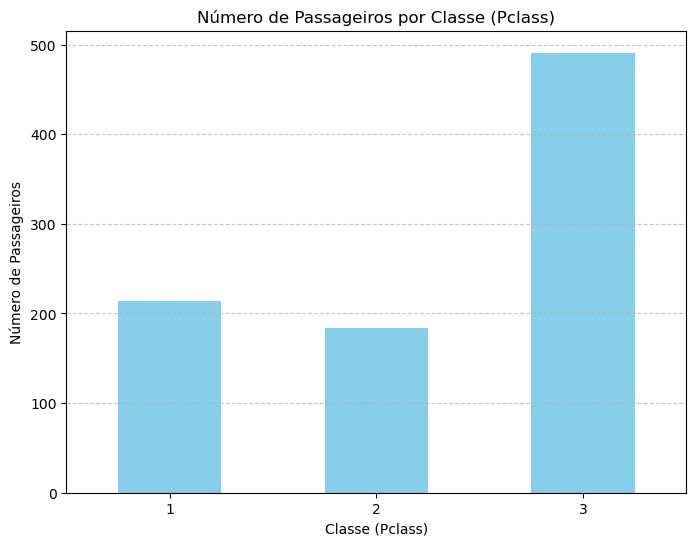

In [24]:
# Agora vou contar o número de passageiros em cada categoria de Pclass e criar um gráfico de barras utilizando matplotlib
contagem_pclass = df['Pclass'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
contagem_pclass.plot(kind='bar', color='skyblue')
plt.title('Número de Passageiros por Classe (Pclass)')
plt.xlabel('Classe (Pclass)')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)  # Manter os rótulos do eixo x horizontais
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

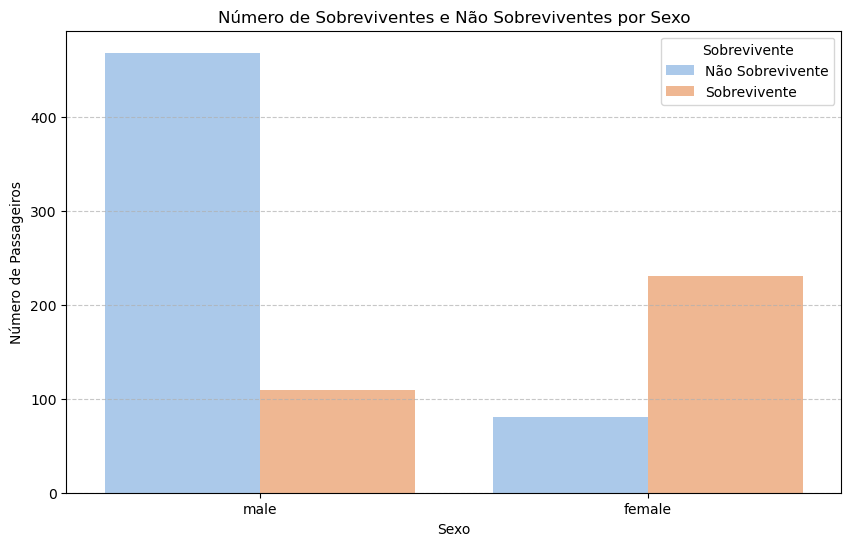

In [25]:
# Agora vou criar um gráfico de barras para mostrar o número de sobreviventes e não sobreviventes separados por sexo.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='pastel')

plt.title('Número de Sobreviventes e Não Sobreviventes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobrevivente', labels=['Não Sobrevivente', 'Sobrevivente'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

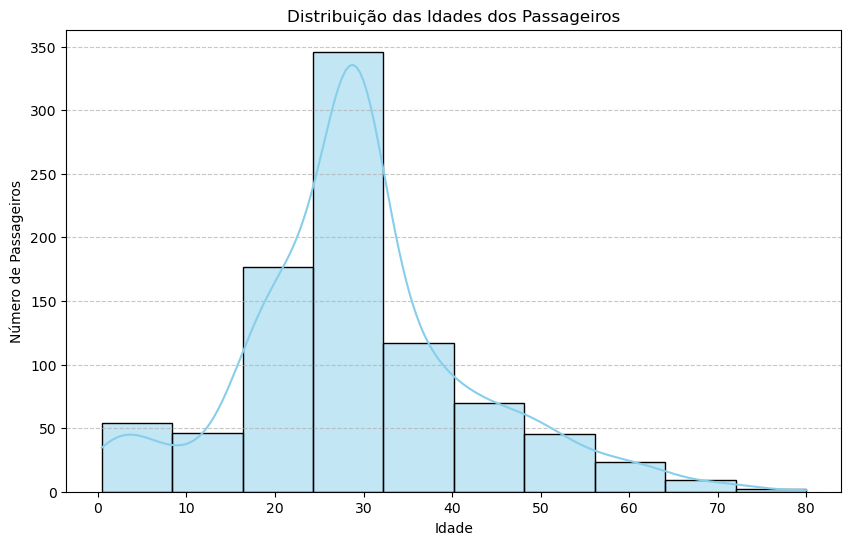

In [26]:
# Agora será criado um histograma das idades dos passageiros

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribuição das Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [27]:
# Média de sobreviventes por porto de embarcação
media_sobreviventes_por_embarked = df.groupby('Embarked')['Survived'].mean().reset_index()

print(media_sobreviventes_por_embarked)

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


In [28]:
# Agora irei conferir qual classe teve o maior numero de sobreviventes
sobreviventes_por_classe = df.groupby('Pclass')['Survived'].sum()

classe_maior_sobreviventes = sobreviventes_por_classe.idxmax()
numero_sobreviventes = sobreviventes_por_classe.max()

print(f"A classe com o maior número de sobreviventes é a {classe_maior_sobreviventes} com {numero_sobreviventes} sobreviventes.")

A classe com o maior número de sobreviventes é a 1 com 134 sobreviventes.


In [29]:
# Agora iremos verificar se ter familia a bordo aumenta as chances de sobrevivencia

df['Has_Family'] = df['FamilySize'] > 0

media_sobreviventes_com_familia = df[df['Has_Family']]['Survived'].mean()
media_sobreviventes_sem_familia = df[~df['Has_Family']]['Survived'].mean()

print(f"Média de sobreviventes com familiares a bordo: {media_sobreviventes_com_familia:.2f}")
print(f"Média de sobreviventes sem familiares a bordo: {media_sobreviventes_sem_familia:.2f}")

# Foi criado um condicional apenas para validarmos nossa tese'
if media_sobreviventes_com_familia > media_sobreviventes_sem_familia:
    print("Ter familiares a bordo parece aumentar a chance de sobrevivência.")
else:
    print("Ter familiares a bordo não parece aumentar a chance de sobrevivência.")

Média de sobreviventes com familiares a bordo: 0.51
Média de sobreviventes sem familiares a bordo: 0.30
Ter familiares a bordo parece aumentar a chance de sobrevivência.


Aqui extraímos algumas informações importantes. A primeira é que a classe com o maior número de sobreviventes é a 1ª, e isso não acontece por acaso. As cabines dessa classe ficavam na parte superior do navio, mais próximas dos botes salva-vidas. A segunda informação é que a média de sobreviventes com familiares é ligeiramente maior que a média de sobreviventes sem familiares a bordo, indicando que ter família a bordo aumentou as chances de sobrevivência.

In [30]:
# Será criado uma nova coluna para validar quais passageiros são menores de idade
df['isChild'] = df['Age'] < 18

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [31]:
# Será criado um pivot table mostrando a média de sobreviventes para cada classe e sexo.

pivot_table = df.pivot_table(
    index='Pclass',     # Linha
    columns='Sex',      # Colunas
    values='Survived',  # Valores para calcular a média
    aggfunc='mean'      # Função de agregação: calcular a média
)

print(pivot_table)

Sex       female      male
Pclass                    
1       0.967391  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


In [32]:
# será criado uma coluna 'Title' extraída do nome do passageiro(a).
df['Title'] = df['Name'].str.extract(r',\s*([A-Za-z]+)\.')

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [33]:
# será aplicado uma função de normalização nos valores da coluna fare e em seguida um apply para aplicar o normalize a cada valor da coluna fare.
def normalize(fare):

    return (fare - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

df['Fare_Normalized'] = df['Fare'].apply(normalize)

print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [34]:
# Agora foi agrupado por 'Title' e mostrado a média de idade, tarifa e sobrevivência.
grouped = df.groupby('Title').mean()


print(grouped[['Age', 'Fare', 'Survived']])

                Age       Fare  Survived
Title                                   
Capt      70.000000  71.000000  0.000000
Col       58.000000  30.500000  0.500000
Don       40.000000  27.000000  0.000000
Dr        40.142857  48.714286  0.428571
Jonkheer  38.000000   0.000000  0.000000
Lady      48.000000  39.000000  1.000000
Major     48.500000  28.000000  0.500000
Master     7.016750  34.250000  0.575000
Miss      23.121547  43.132597  0.696133
Mlle      24.000000  59.000000  1.000000
Mme       24.000000  69.000000  1.000000
Mr        31.592843  24.021277  0.156673
Mrs       34.741935  44.508065  0.790323
Ms        28.000000  13.000000  1.000000
Rev       43.166667  18.166667  0.000000
Sir       49.000000  56.000000  1.000000


In [35]:
# Foi feito uma distribuição de passageiros agrupados pelo titulo e a classe.
distribution = df.groupby(['Title', 'Pclass']).size().unstack(fill_value=0)

print(distribution)

Pclass      1   2    3
Title                 
Capt        1   0    0
Col         2   0    0
Don         1   0    0
Dr          5   2    0
Jonkheer    1   0    0
Lady        1   0    0
Major       2   0    0
Master      3   9   28
Miss       45  34  102
Mlle        2   0    0
Mme         1   0    0
Mr        107  91  319
Mrs        41  41   42
Ms          0   1    0
Rev         0   6    0
Sir         1   0    0


In [36]:
# Agrupado o número de passageiros únicos em cada combinação de 'Embarked' e 'Pclass'.
unique_passengers = df.groupby(['Embarked', 'Pclass'])['PassengerId'].nunique()

print(unique_passengers)

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: PassengerId, dtype: int64


In [37]:
# Foi realizado o calculo da média de tarifa por porto de embarque e classe.
fare_mean = df.groupby(['Embarked', 'Pclass'])['Fare'].mean()
print(fare_mean)


Embarked  Pclass
C         1         104.235294
          2          25.000000
          3          10.833333
Q         1          90.000000
          2          12.000000
          3          10.555556
S         1          69.992126
          2          20.140244
          3          14.144476
Name: Fare, dtype: float64


In [38]:
# Agora eu preciso verificar se há uma correlação entre o local de embarque e a sobrevivência. Nesse caso, eu primeiro irei criar uma tabela de contingencia.
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])

print(contingency_table)


# Em seguida Calcular o Cramér's V para medir a força da associação entre Embarked e Survived.
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)


# Calcular Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217
Cramér's V: 0.17261682709984438


Aqui, para verificar se existe uma correlação entre o local de embarque e a sobrevivência, utilizei o Cramér's V, que é uma medida de associação entre duas variáveis categóricas.

O resultado foi de 0,173, indicando uma correlação fraca entre o local de embarque e a sobrevivência. Embora exista alguma associação, ela não é muito forte (lembrando que, quanto mais próximo do valor 1, maior a relação entre as variáveis).

Embora o local de embarque possa ter algum impacto na sobrevivência, ele provavelmente não é um fator determinante isolado. Outros fatores, como a classe do bilhete, a idade ou se o passageiro tinha familiares a bordo, provavelmente têm uma influência maior.

In [39]:
# Utilizei a função melt para transformar o DataFrame para long format com variáveis 'Age' e 'Fare'.
df_melted = pd.melt(df, id_vars=['PassengerId'], value_vars=['Age', 'Fare'], 
                    var_name='Variable', value_name='Value')

print(df_melted)

      PassengerId Variable  Value
0               1      Age   22.0
1               2      Age   38.0
2               3      Age   26.0
3               4      Age   35.0
4               5      Age   35.0
...           ...      ...    ...
1773          887     Fare   13.0
1774          888     Fare   30.0
1775          889     Fare   23.0
1776          890     Fare   30.0
1777          891     Fare    7.0

[1778 rows x 3 columns]


In [40]:
# Neste codigo irei encontrar todos os passageiros com idades entre 20 e 30 anos.

passengers_20_to_30 = df[(df['Age'] >= 20) & (df['Age'] <= 30)]


print(passengers_20_to_30)


     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
5              6         0       3   
8              9         1       3   
12            13         0       3   
..           ...       ...     ...   
883          884         0       2   
884          885         0       3   
886          887         0       2   
888          889         0       3   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
5                                     Moran, Mr. James    male  29.0      0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
..                                                 ...     ...   ... 

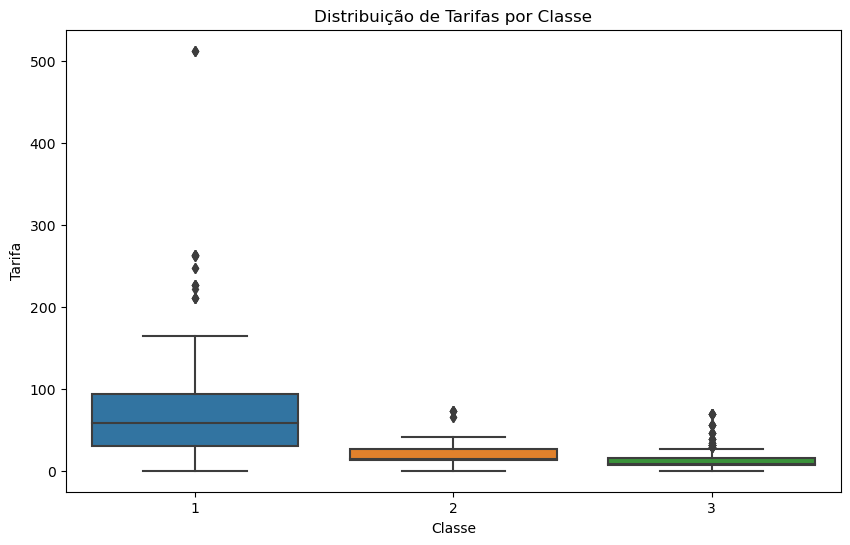

In [41]:
# Criei um boxplot para comparar a distribuição de tarifas entre diferentes classes.

# boxplot usando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)

# título e rótulos aos eixos
plt.title('Distribuição de Tarifas por Classe')
plt.xlabel('Classe')
plt.ylabel('Tarifa')


plt.show()

In [42]:
# Criei uma coluna que categoriza os passageiros com base na tarifa paga: baixa, média e alta utilizando a função cut()
# Intervalos: 0-20 (baixa), 21-50 (média), acima de 50 (alta)
bins = [0, 20, 50, float('inf')] 
labels = ['Baixa', 'Média', 'Alta']

df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Has_Family,isChild,Title,Fare_Normalized,FareCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,1,True,False,Mr,0.013672,Baixa
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,1,True,False,Mrs,0.138672,Alta
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,False,False,Miss,0.013672,Baixa
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,1,True,False,Mrs,0.103516,Alta
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,0,False,False,Mr,0.015625,Baixa


In [43]:
# Utilizei o método do IQR (Interquartile Range) para identificar os outliers na coluna fare.
# Calcular Q1 e Q3
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Definir os limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Valores abaixo de 𝑄 1 − 1.5 × IQR Q1−1.5×IQR ou acima de 𝑄 3 + 1.5 × IQR Q3+1.5×IQR são geralmente considerados outliers.
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

print("Limite Inferior:", lower_bound)
print("Limite Superior:", upper_bound)
print("\nOutliers identificados:")
print(outliers)

Limite Inferior: -29.0
Limite Superior: 67.0

Outliers identificados:
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  29.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

In [44]:
# Analise de sobrevivencia para passageiros sem parentes a bordo.
passengers_no_family = df[df['FamilySize'] == 0]

# Calcular a taxa de sobrevivência
survival_rate_no_family = passengers_no_family['Survived'].mean() * 100

print(f"Taxa de sobrevivência para passageiros sem parentes a bordo: {survival_rate_no_family:.2f}%")

overall_survival_rate = df['Survived'].mean() * 100
print(f"Taxa de sobrevivência geral: {overall_survival_rate:.2f}%")

Taxa de sobrevivência para passageiros sem parentes a bordo: 30.09%
Taxa de sobrevivência geral: 38.25%


In [45]:
#Feito a comparação da taxa de sobrevivência entre passageiros com e sem cabines atribuídas.

# Identificar passageiros com e sem cabines atribuídas
df['HasCabin'] = df['Cabin'].notna()

# Calcular a taxa de sobrevivência para passageiros com cabine
survival_rate_with_cabin = df[df['HasCabin']]['Survived'].mean() * 100

# O simbolo ~ é um operador de negação em pandas, utilizado para converter uma operação booleana
survival_rate_without_cabin = df[~df['HasCabin']]['Survived'].mean() * 100

print(f"Taxa de sobrevivência para passageiros com cabine atribuída: {survival_rate_with_cabin:.2f}%")
print(f"Taxa de sobrevivência para passageiros sem cabine atribuída: {survival_rate_without_cabin:.2f}%")

Taxa de sobrevivência para passageiros com cabine atribuída: 66.34%
Taxa de sobrevivência para passageiros sem cabine atribuída: 29.99%


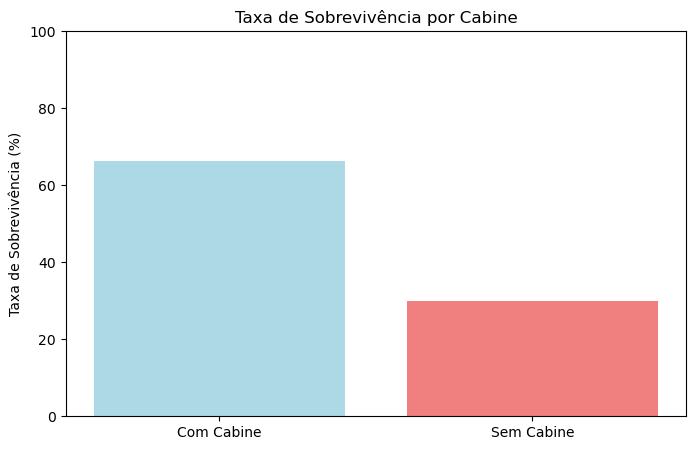

In [46]:
# Dados para visualização
survival_rates = [survival_rate_with_cabin, survival_rate_without_cabin]
labels = ['Com Cabine', 'Sem Cabine']

plt.figure(figsize=(8, 5))
plt.bar(labels, survival_rates, color=['lightblue', 'lightcoral'])
plt.title('Taxa de Sobrevivência por Cabine')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.ylim(0, 100)
plt.show()

Por meio do gráfico Podemos ver que existe uma diferença clara de taxa de sobrevivencia para passageiros com cabine atribuida.

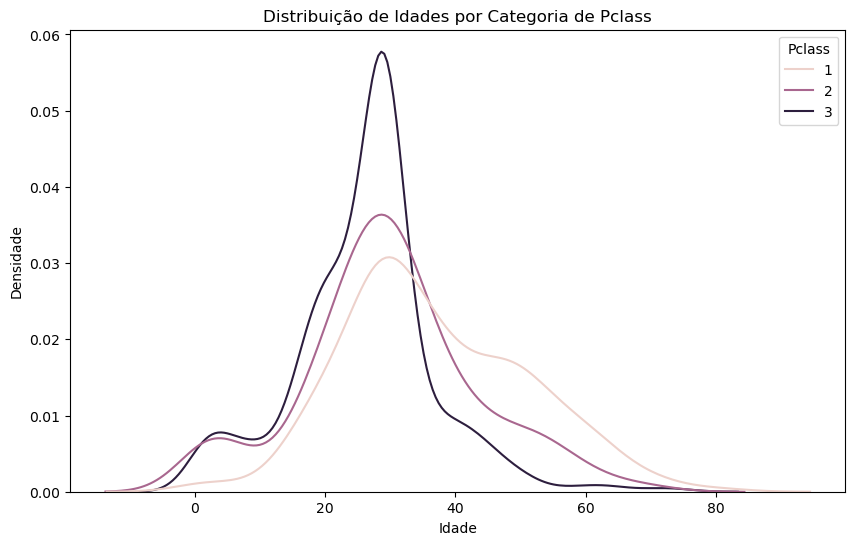

In [47]:
# Agora vamos visualizar a distribuição de idades para cada categoria de 'Pclass' usando um gráfico de densidade.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Pclass', common_norm=False)

# Adicionar título e labels
plt.title('Distribuição de Idades por Categoria de Pclass')
plt.xlabel('Idade')
plt.ylabel('Densidade')

plt.show()

In [48]:
# Criei um relatório com a taxa de sobrevivência por idade e sexo.
bins = [0, 12, 18, 30, 40, 50, 60, 100]
labels = ['0-12', '13-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calcular a taxa de sobrevivência por faixa etária e sexo
survival_rate = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().reset_index()
survival_rate['Survived'] = survival_rate['Survived'] * 100  # Converter para porcentagem

print(survival_rate)

   AgeGroup     Sex    Survived
0      0-12  female   59.375000
1      0-12    male   56.756757
2     13-18  female   75.000000
3     13-18    male    8.823529
4     19-30  female   72.727273
5     19-30    male   14.473684
6     31-40  female   83.333333
7     31-40    male   23.000000
8     41-50  female   67.741935
9     41-50    male   21.818182
10    51-60  female   92.857143
11    51-60    male   14.285714
12      60+  female  100.000000
13      60+    male   10.526316


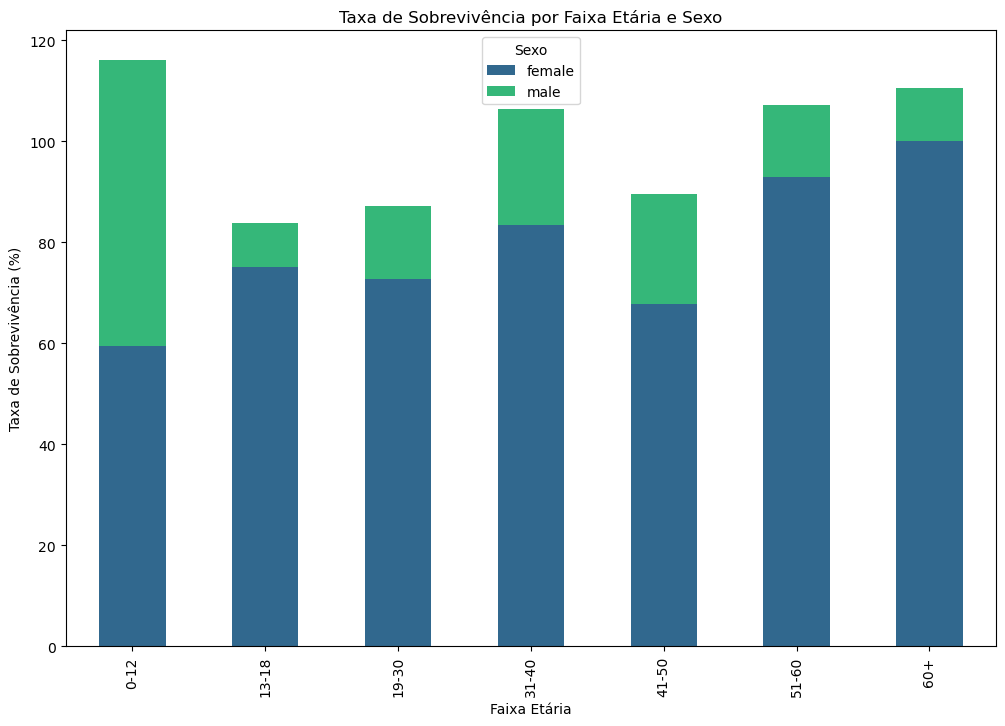

In [49]:
# Aqui será o gráfico representando o relatório acima

# Pivotando os dados para que cada sexo fique em colunas separadas
pivot_data = survival_rate.pivot(index='AgeGroup', columns='Sex', values='Survived')

# Criando as barras empilhadas com matplotlib
pivot_data.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', 2), figsize=(12, 8))

# Adicionando título e labels
plt.title('Taxa de Sobrevivência por Faixa Etária e Sexo')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência (%)')

plt.legend(title='Sexo')
plt.show()

In [50]:
# Agora faremos uma analise detalhada da relação entre o local de embarque e a classe socioeconômica dos passageiros.
embarked_pclass_counts = df.groupby(['Embarked', 'Pclass']).size().unstack()

print(embarked_pclass_counts)

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


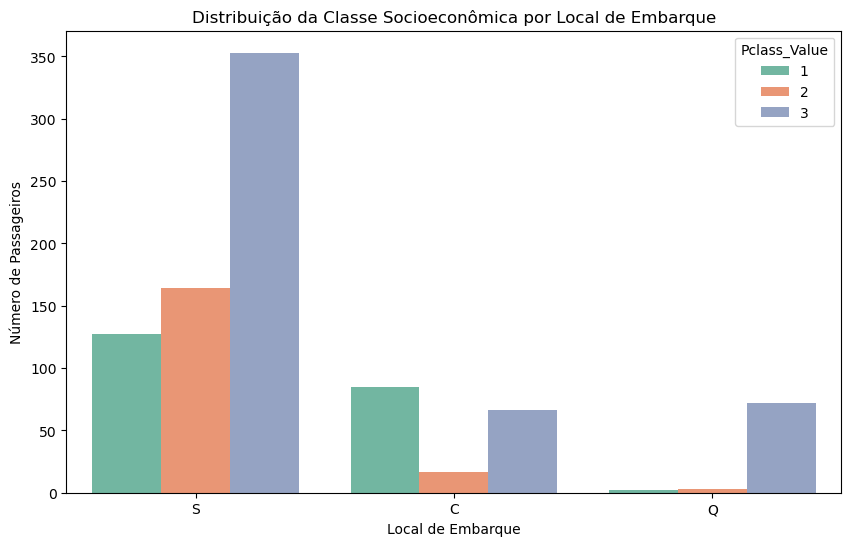

In [51]:
# Reformatar os dados para o formato longo para visualização
long_df = df.melt(id_vars='Embarked', value_vars='Pclass', var_name='Class_Type', value_name='Pclass_Value')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=long_df, x='Embarked', hue='Pclass_Value', palette='Set2')

# Adicionar título e labels
plt.title('Distribuição da Classe Socioeconômica por Local de Embarque')
plt.xlabel('Local de Embarque')
plt.ylabel('Número de Passageiros')

plt.show()

Podemos ver que o local de embarque S foi o local que mais teve embarques em todas as classes. Isso acontece porque o embarque S é Southampton que é a maior cidade portuária da costa sul do Reino Unido e foi de lá que o titanic partiu em sua viagem.

In [52]:
# Agora vamos exportar o arquivo no formato csv

df.to_csv('titanic_final.csv', index=False)
